## FEATURE ENGINEERING

### IMPORTING MODULES

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import urllib
from urllib import request
import numpy as np
import sklearn 
from statistics import mean 
import statistics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

### INJECTION OF DATA AND ADDITION OF COLUMNS

In [2]:
url = "https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv"
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['month'] , df['time'] , df['hour'] ,df['day'] , df['day_of_week'] =  df['date'].dt.month , df['date'].dt.time , df['date'].dt.hour , df['date'].dt.day , df['date'].dt.weekday_name
df['weekStatus'] = df['date'].dt.dayofweek
df['WeekStatus'] = np.where(df['weekStatus'] < 5, 'Weekday', 'Weekend')


# converting the time to seconds , appending that column to the existing dataframe and then making the 'date' column as index to 
# the dataset.
d = df.date[0:len(df.date)]
data = []
for i in range (len(d)):
    if (i==0):
        a = 61200
        data.append(a)
    elif (i > 0 ):
        a = a + 600
        data.append(a)

df1 = pd.DataFrame({'data_converted' : data})
df['NSM'] = df1

#SETTING DATE COLUMN AS INDEX
df = df.set_index('date')

### CHECKING FOR NULL DATA

In [5]:
pd.isnull(df)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,month,time,hour,day,day_of_week,weekStatus,WeekStatus,data_converted
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-11 17:10:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-11 17:20:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-11 17:30:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-11 17:40:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-11 17:50:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-11 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-11 18:10:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-11 18:20:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### CHECKING THE DATA FORMAT

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 36 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non

### DETECTING OUTLIERS

In [3]:
#Log method : 
'''
df_3=df.Appliances
a1 = df_3.values.reshape(-1,1)
df = df.drop(['Appliances'] ,axis = 1)
df=df.drop(['day_of_week'] ,axis = 1)
df=df.drop(['WeekStatus'] ,axis = 1)
df=df.drop(['time'] ,axis = 1)
df_4=df
#a2 = df_4.values.reshape(-1,1)

model = LinearRegression().fit(a1, df_4)
yfit = model.predict(a1)
plt.scatter(df_3, df_4)
plt.plot(df_3, yfit)
plt.show()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False)
X2 = poly.fit_transform(a1)

model = LinearRegression().fit(X2, df_4)
yfit = model.predict(X2)
plt.scatter(df_3,df_4)
plt.plot(df_3 ,yfit)
plt.show()
'''

df_3=df.Appliances[0:100]
a1 = df_3.values.reshape(-1,1)
#df = df.drop(['Appliances'] ,axis = 1)
#df=df.drop(['day_of_week'] ,axis = 1)
#df=df.drop(['WeekStatus'] ,axis = 1)
#df=df.drop(['time'] ,axis = 1)
df_4=df.T1[0:100]
#a2 = df_4.values.reshape(-1,1)

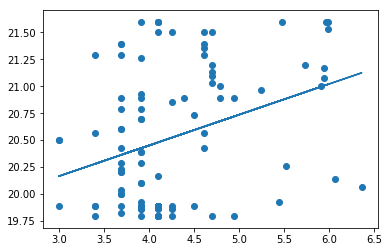

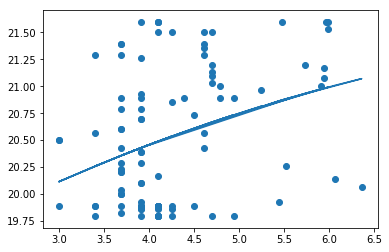

In [10]:
model = LinearRegression().fit(a1, df_4)
yfit = model.predict(a1)
plt.scatter(df_3, df_4)
plt.plot(df_3, yfit)
plt.show()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X2 = poly.fit_transform(a1)

model = LinearRegression().fit(X2, df_4)
yfit = model.predict(X2)
plt.scatter(df_3,df_4)
plt.plot(df_3 ,yfit)
plt.show()

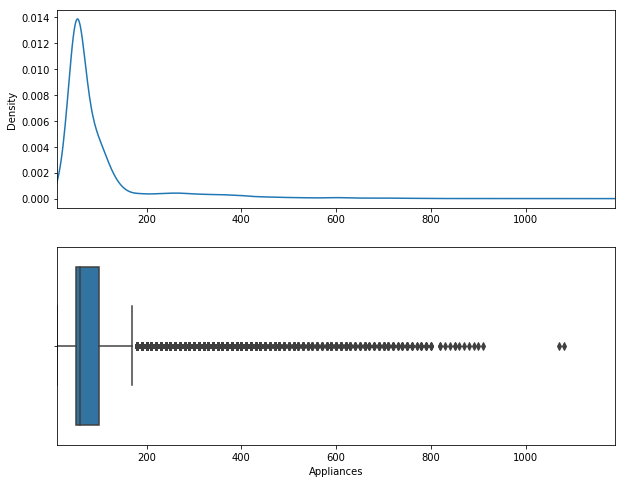

In [6]:
i = 'Appliances'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.show()

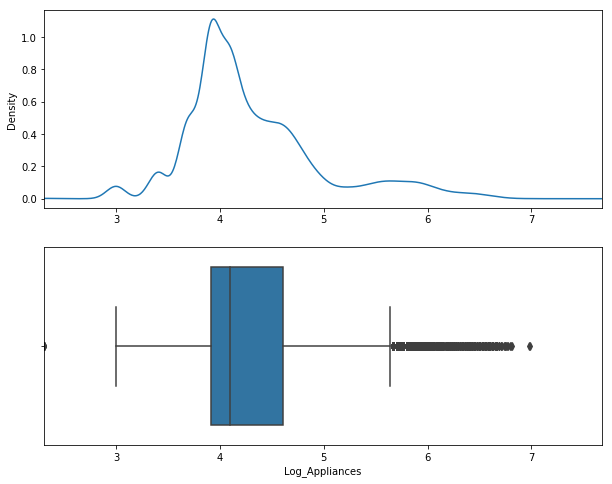

In [7]:
# Log Transform
df['Log_' + i] = np.log(df[i])

i = 'Log_Appliances'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.show()

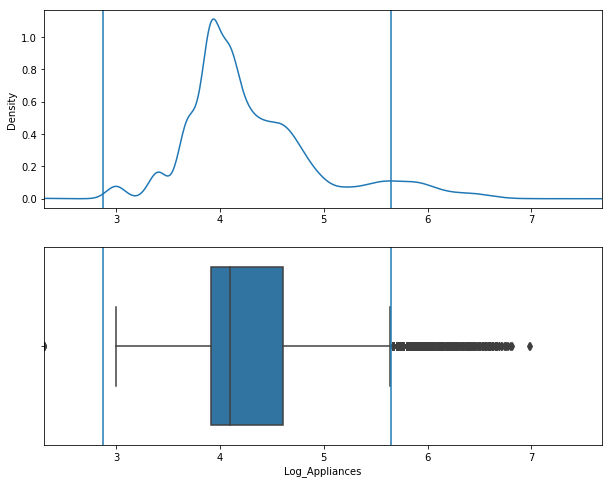

In [8]:
q75, q25 = np.percentile(df.Log_Appliances.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

i = 'Log_Appliances'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)
plt.show()

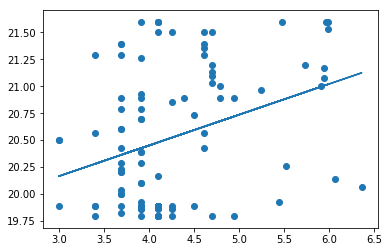

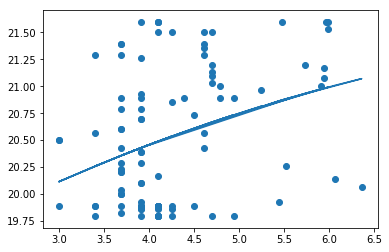

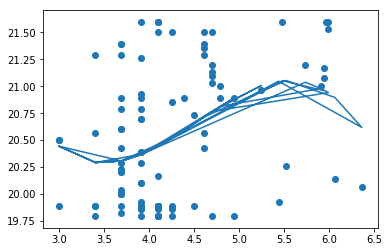

In [11]:
#df_3=df.Log_Appliances[100:200]
#a1 = df_3.values.reshape(-1,1)
#df_4=df.RH_2[100:200]
#a2 = df_4.reshape(-1,2)

df_3=df.Log_Appliances[0:100]
a1 = df_3.values.reshape(-1,1)
#df = df.drop(['Appliances'] ,axis = 1)
#df=df.drop(['day_of_week'] ,axis = 1)
#df=df.drop(['WeekStatus'] ,axis = 1)
#df=df.drop(['time'] ,axis = 1)
df_4=df.T1[0:100]
#a2 = df_4.values.reshape(-1,1)

model = LinearRegression().fit(a1, df_4)
yfit = model.predict(a1)
plt.scatter(df_3, df_4)
plt.plot(df_3, yfit)
plt.show()

poly = PolynomialFeatures(degree=2, include_bias=False)
X2 = poly.fit_transform(a1)

model = LinearRegression().fit(X2, df_4)
yfit = model.predict(X2)
plt.scatter(df_3, df_4)
plt.plot(df_3 ,yfit)
plt.show()

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(a1)

model = LinearRegression().fit(X2, df_4)
yfit = model.predict(X2)
plt.scatter(df_3, df_4)
plt.plot(df_3 ,yfit)
plt.show()

#### * The above method , though it gives us the outliers , it doesn't improve the output. So , we go for other methods.*
### There are 7 methods to scale a data to fit the outliers :
####  1. Standard Scaler
####  2. MinMax Scaler 
####  3. MaxABS Scaler
####  4. Robust Scaler
####  5. Quartile transformer(normal)
####  6. Quartile transformer(uniform)
####  7. Normalizer

In [33]:
#df = df.drop(['date'] , axis = 1)
df = df.drop(['WeekStatus'] ,axis = 1)
#df = df.drop(['hour'] ,axis = 1)
df = df.drop(['time'] ,axis = 1)
df = df.drop(['month'] ,axis = 1)
df = df.drop(['day_of_week'] ,axis = 1)
#df = df.drop(['day'] ,axis = 1)
#df = df.drop(['weekStatus'] ,axis = 1)
#x_std = df.drop([])
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day,weekStatus,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17,11,0,61200
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17,11,0,61800
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17,11,0,62400
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17,11,0,63000
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17,11,0,63600
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,17,11,0,64200
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,...,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,18,11,0,64800
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,18,11,0,65400
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,18,11,0,66000


In [34]:
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(df)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','hour','day','weekStatus','NSM'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(df)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','hour','day','weekStatus','NSM'])

scaler = preprocessing.MaxAbsScaler()
max_scaled_df = scaler.fit_transform(df)
max_scaled_df = pd.DataFrame(max_scaled_df, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2' , 'hour','day','weekStatus','NSM'])

scaler = preprocessing.Normalizer()
Normalizer_scaled_df = scaler.fit_transform(df)
Normalizer_scaled_df = pd.DataFrame(Normalizer_scaled_df, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2' ,'hour','day','weekStatus','NSM'])

scaler = preprocessing.StandardScaler()
Standard_scaled_df = scaler.fit_transform(df)
Standard_scaled_df = pd.DataFrame(Standard_scaled_df, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2' ,'hour','day','weekStatus','NSM'])

scaler = preprocessing. QuantileTransformer(output_distribution='uniform')
uniform_scaled_df = scaler.fit_transform(df)
uniform_scaled_df = pd.DataFrame(uniform_scaled_df, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2' ,'hour','day','weekStatus','NSM'])

scaler = preprocessing. QuantileTransformer(output_distribution='normal')
normal_scaled_df = scaler.fit_transform(df)
normal_scaled_df = pd.DataFrame(normal_scaled_df, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2' ,'hour','day','weekStatus','NSM'])

    
'''
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(19, 15))
ax1.set_title('Before Scaling')
sns.kdeplot(x_std['Appliances'], ax=ax1)
sns.kdeplot(x_std['lights'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['Appliances'], ax=ax2)
sns.kdeplot(robust_scaled_df['lights'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['Appliances'], ax=ax3)
sns.kdeplot(minmax_scaled_df['lights'], ax=ax3)
plt.show()  year , month, time, hour, day, day_of_week, weekStatus, WeekStatus
'''

print(robust_scaled_df[:5]) # negative values
print(minmax_scaled_df[:5])
print(max_scaled_df[:5]) 
print(Normalizer_scaled_df[:10]) # very less value for each observation
print(Standard_scaled_df[:5])  # negative values
print(uniform_scaled_df[:5])  # weekstatus conversion is not good
print(normal_scaled_df[:5])  # gives negative output

   Appliances  lights        T1      RH_1        T2      RH_2     T3  \
0         0.0    30.0 -0.929348  1.384884 -0.295203  0.800373 -0.924   
1         0.0    30.0 -0.929348  1.227326 -0.295203  0.787780 -0.924   
2        -0.2    30.0 -0.929348  1.158721 -0.295203  0.769900 -0.924   
3        -0.2    40.0 -0.929348  1.118023 -0.295203  0.763060 -0.924   
4         0.0    40.0 -0.929348  1.164535 -0.295203  0.751866 -0.924   

       RH_3        T4      RH_4    ...       RH_out  Windspeed  Visibility  \
0  1.275720 -0.648508  1.081489    ...     0.390625   0.952381    2.090909   
1  1.288066 -0.648508  1.145749    ...     0.390625   0.857143    1.742424   
2  1.317558 -0.677043  1.130282    ...     0.390625   0.761905    1.393939   
3  1.331276 -0.691310  1.105131    ...     0.390625   0.666667    1.045455   
4  1.331276 -0.691310  1.075956    ...     0.390625   0.571429    0.696970   

   Tdewpoint       rv1       rv2      hour       day  weekStatus       NSM  
0   0.329412 -0.46329

[5 rows x 32 columns]


### * Out of the 7 methods , MinMax scaler , MaxABS scaler , Quartile transformer(uniform) and Normalizer  methods are proven to be better as other methods are giving negative values*

### Other methods to deal with outliers: 
#### 1. Standard Deviation
#### 2. Quartile Method
#### 3. Eliminating outliers

In [78]:
r1 = df.Appliances.mean()
r2 = df.Appliances.std()
r3 = (df.Appliances - r1)/r2
r3

0       -0.367666
1       -0.367666
2       -0.465204
3       -0.465204
4       -0.367666
5       -0.465204
6       -0.367666
7       -0.367666
8       -0.367666
9       -0.270129
10       1.290468
11       4.704273
12       3.241213
13       1.485542
14       0.022483
15       0.022483
16      -0.075055
17      -0.270129
18      -0.172592
19       0.412632
20       0.217557
21       0.900318
22       0.120020
23       0.120020
24       0.120020
25       0.120020
26       0.022483
27       0.022483
28       0.022483
29       0.022483
           ...   
19705    1.778154
19706    1.388005
19707    1.485542
19708    1.192930
19709    1.290468
19710    0.900318
19711    0.607706
19712   -0.172592
19713   -0.367666
19714   -0.367666
19715   -0.367666
19716   -0.367666
19717   -0.270129
19718   -0.172592
19719   -0.172592
19720   -0.270129
19721    0.022483
19722    0.022483
19723   -0.075055
19724    0.022483
19725    1.192930
19726    0.802781
19727    0.217557
19728    0.120020
19729   -0

#### *Produces negative value  ,so not advisable* 

In [77]:
q75 = np.percentile(df.Appliances ,75)# ,25])
q25 = np.percentile(df.Appliances ,25)# ,25])

#print(q75 , q25)
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

print ( min , max)

-25.0 175.0


#### * In this method , anything above 175 is considered as outliers , so this is not a advisable method.*

In [79]:
r1 = df.Appliances.mean()
r2 = df.Appliances.std()
r3 = (df.Appliances - r1 )/r2


final_list = [x for x in df.Appliances if(x > r1 -2 * r2)]
final_list = [x for x in final_list if (x < r1 +2 * r2)]

final_list

[60,
 60,
 50,
 50,
 60,
 50,
 60,
 60,
 60,
 70,
 230,
 250,
 100,
 100,
 90,
 70,
 80,
 140,
 120,
 190,
 110,
 110,
 110,
 110,
 100,
 100,
 100,
 100,
 110,
 240,
 60,
 60,
 60,
 50,
 70,
 60,
 40,
 40,
 30,
 40,
 50,
 120,
 50,
 40,
 50,
 40,
 50,
 50,
 50,
 40,
 40,
 30,
 20,
 20,
 40,
 50,
 50,
 40,
 50,
 40,
 40,
 40,
 60,
 50,
 50,
 40,
 40,
 40,
 40,
 50,
 70,
 40,
 30,
 20,
 30,
 40,
 50,
 60,
 60,
 70,
 60,
 140,
 110,
 90,
 60,
 60,
 60,
 50,
 60,
 50,
 30,
 40,
 30,
 260,
 50,
 60,
 60,
 50,
 50,
 50,
 60,
 60,
 60,
 60,
 190,
 220,
 170,
 90,
 60,
 290,
 130,
 140,
 240,
 50,
 60,
 60,
 60,
 200,
 70,
 50,
 40,
 40,
 30,
 30,
 30,
 30,
 40,
 50,
 40,
 40,
 40,
 60,
 60,
 210,
 230,
 80,
 90,
 70,
 40,
 40,
 30,
 50,
 50,
 60,
 50,
 60,
 60,
 60,
 50,
 50,
 50,
 50,
 50,
 60,
 60,
 40,
 30,
 30,
 30,
 40,
 50,
 50,
 50,
 40,
 50,
 40,
 40,
 40,
 40,
 50,
 50,
 50,
 30,
 20,
 30,
 20,
 40,
 50,
 60,
 50,
 40,
 40,
 50,
 40,
 40,
 50,
 50,
 50,
 40,
 30,
 20,
 20,
 20,
 50,

#### *As this is a time-series dataset , datapoint should never be omitted and moreover outliers inluence the output a lot. So they should be kept*

### We are only left with scaling methods now.
#### **Minmax scaler** : MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005] . 
#### Normalizer : The Normalizer rescales the vector for each sample to have unit norm, independently of the distribution of the samples
#### Quantile Transformer(uniform output) :  This applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform distribution. In this case, all the data will be mapped in the range [0, 1], even the outliers which cannot be distinguished anymore from the inliers.
#### MinABS scaler : MaxAbsScaler differs from the previous scaler such that the absolute values are mapped in the range [0, 1]. On positive only data, this scaler behaves similarly to MinMaxScaler and therefore also suffers from the presence of large outliers.

### Out of all 4 , we chose MinMax scaler because it is sensitive to outliers and this is one scaler which can be used when there are many outliers apart from robust scaler( eliminated because it gave negative output)

In [8]:
scaler = preprocessing.MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2','hour','day','weekStatus'])
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day,weekStatus
0,0.046729,0.428571,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449,0.739130,0.333333,0.000000
1,0.046729,0.428571,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083,0.739130,0.333333,0.000000
2,0.037383,0.428571,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848,0.739130,0.333333,0.000000
3,0.037383,0.571429,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261,0.739130,0.333333,0.000000
4,0.046729,0.571429,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611,0.739130,0.333333,0.000000
5,0.037383,0.571429,0.327350,0.522980,0.225345,0.675883,0.215188,0.755569,0.341441,0.771233,...,0.109302,0.894737,0.380952,0.658974,0.515837,0.898441,0.898441,0.739130,0.333333,0.000000
6,0.046729,0.714286,0.327350,0.515824,0.225345,0.675883,0.215188,0.754012,0.341441,0.773794,...,0.111628,0.894737,0.357143,0.600000,0.511312,0.944735,0.944735,0.782609,0.333333,0.000000
7,0.046729,0.714286,0.323830,0.510137,0.225345,0.675883,0.210203,0.754012,0.341441,0.776924,...,0.113178,0.892544,0.369048,0.600000,0.510558,0.660808,0.660808,0.782609,0.333333,0.000000
8,0.046729,0.571429,0.316790,0.511169,0.225345,0.674009,0.210203,0.748871,0.341441,0.773794,...,0.114729,0.890351,0.380952,0.600000,0.509804,0.629118,0.629118,0.782609,0.333333,0.000000
9,0.056075,0.571429,0.323830,0.524723,0.227526,0.673072,0.215188,0.752298,0.341441,0.786883,...,0.116279,0.888158,0.392857,0.600000,0.509050,0.061691,0.061691,0.782609,0.333333,0.000000
